In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('marketing_customer_analysis_round4.csv')

# Show the dataframe shape

In [3]:
df.shape

(10910, 27)

# Standardize header names

In [4]:
cols = []
for i in list(df.columns):
    cols.append(i.lower().replace(' ', '_').replace(':', ''))
df.columns = cols
df.columns

Index(['unnamed_0', 'unnamed_0', 'customer', 'state',
       'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

# Which columns are numerical?

In [5]:
num_cols = list(df.select_dtypes([np.number]).columns)
print(f'The columns {num_cols} are numerical.')

The columns ['unnamed_0', 'unnamed_0', 'customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount'] are numerical.


# Which columns are categorical?

In [6]:
cat_cols = list(df.select_dtypes(exclude=['number','bool_']).columns)
print(f'The columns {cat_cols} are categorical.')

The columns ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'] are categorical.


# Check and deal with NaN values

First, we will remove all rows in which all values are NaN.

In [7]:
df = df.dropna(how='all')
df.reset_index(drop=True, inplace=True)

Then, we'll deal with NaN values in numerical columns. We'll be replacing them by the median of their own column, because, although the mean and median are not very different, the former might be influed by outliers.

In [8]:
num_vars = ['months_since_last_claim', 'number_of_open_complaints']
for var in num_vars:
    median = df[var].median()
    df[var] = df[var].fillna(median)

Finally, we'll adress the NaN values in categorical columns. In this case, we'll replace them by the string 'Unknown'. Since these are the only NULLS pending, we can just apply the function fillna() to the whole DataFrame.

In [9]:
df = df.fillna('Unknown')

In [10]:
#snapshot table for handling nulls
nulls_df = pd.DataFrame(round(df.isna().sum()/len(df), 4) * 100)
nulls_df = nulls_df.rename(columns={'index':'header', 0: 'prop_nulls'})
nulls_df.index.name = 'header'
nulls_df

,prop_nulls
header,
unnamed_0,0.0
unnamed_0,0.0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0


# Datetime format - Extract the months from the dataset and store in a separate column

First, we will import the necessary modules and convert the column effective_to_date to datetime type.

In [11]:
from datetime import date

In [12]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

Then, we will create a new column in our dataframe with the value of the month for each row, which we will have extracted from the effective_to_date column.

In [13]:
df['month'] = df['effective_to_date'].dt.strftime('%m')

## Filter the data to show only the information for the first quarter

Once we have extracted the month for each row and stored it in a new column, we will filter the dataframe and create a new one with only the results from the frist quarter (months 01, 02 and 03).

In [14]:
months = ['01', '02', '03']
first_quarter = df[df.month.isin(months)]
first_quarter.head()

,unnamed_0,unnamed_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,02
1,1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,01
2,2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,02
3,3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,01
4,4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,01


# BONUS: Put all the previously mentioned data transformations into a function

In [15]:
def data_transformation(data):
    # Variables we'll need
    shape = data.shape
    cols = []
    num_vars = ['months_since_last_claim', 'number_of_open_complaints']
    months = ['01', '02', '03']
    # 1. Shape
    print(f"This dataset's shape is: {shape}")
    # 2. Standardize header names
    for i in list(data.columns):
        cols.append(i.lower().replace(' ', '_').replace(':', ''))
    data.columns = cols
    # 3. Numerical columns
    num_cols = list(data.select_dtypes([np.number]).columns)
    print(f'The columns {num_cols} are numerical.')
    # 4. Categorical columns
    cat_cols = list(data.select_dtypes(exclude=['number','bool_']).columns)
    print(f'The columns {cat_cols} are categorical.')
    # 5. Checking and dealing with NaN values
    data = data.dropna(how='all')
    data.reset_index(drop=True, inplace=True)
    for var in num_vars:
        median = data[var].median()
        data[var] = data[var].fillna(median)
    data = data.fillna('Unknown')
    # 6. Datetime
    data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
    data['month'] = data['effective_to_date'].dt.strftime('%m')
    first_quarter = data[data.month.isin(months)]
    return first_quarter

data_transformation(df)

This dataset's shape is: (10910, 28)
The columns ['unnamed_0', 'unnamed_0', 'customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount'] are numerical.
The columns ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type', 'month'] are categorical.


,unnamed_0,unnamed_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,02
1,1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,01
2,2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,02
3,3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,01
4,4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,01
10906,10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,01
10907,10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,02
10908,10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,02


In [16]:
# Dropping the vehicle_type column, which had half NaN values:
df = df.drop(['vehicle_type'], axis=1)

# Show DataFrame info

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

# Describe DataFrame

In [18]:
df.describe()

,unnamed_0,unnamed_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,5454.500000,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330
std,3149.590053,3149.590053,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556
min,0.000000,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Show a plot of the total number of responses (for each response type - "Yes"/"No")

In [19]:
# There are NaN values in the response column, so we need to conver them to strings. We'll label them as 'Unknown'.
df['response'] = df['response'].fillna('Unknown')

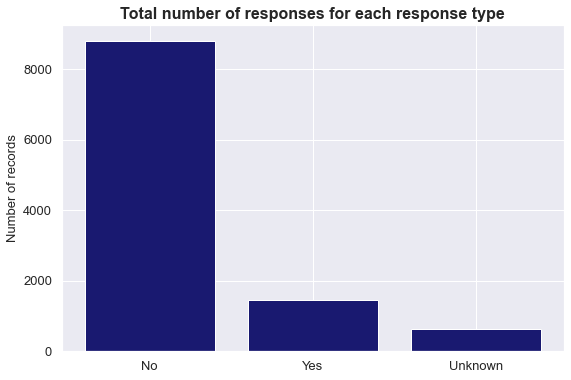

In [20]:
plt.figure(figsize = (9, 6))
plt.bar(x = df["response"].unique(),
        height = df["response"].value_counts(),
        color = "midnightblue")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Total number of responses for each response type", fontsize = 16, fontweight = "bold")
plt.ylabel("Number of records", fontsize = 13 )
plt.show()

# Show a plot of the rate of the response types by each Sales Channel

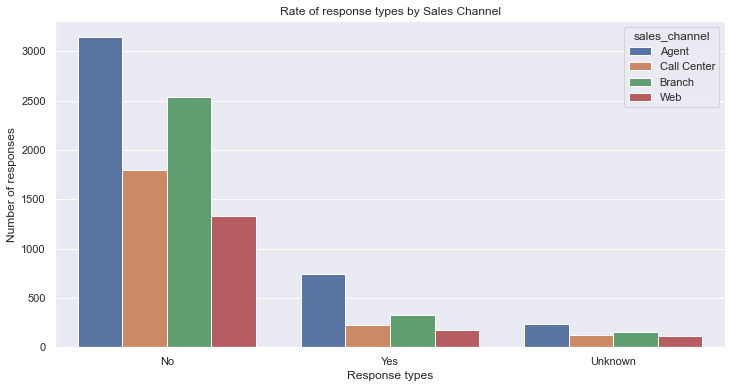

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='response', hue='sales_channel', data=df, ax=ax)
plt.ylabel('Number of responses')
plt.xlabel('Response types')
plt.title("Rate of response types by Sales Channel")
plt.show()

# Show a plot of the distribution of the Total Claim Amount, broken down by response type
Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here).

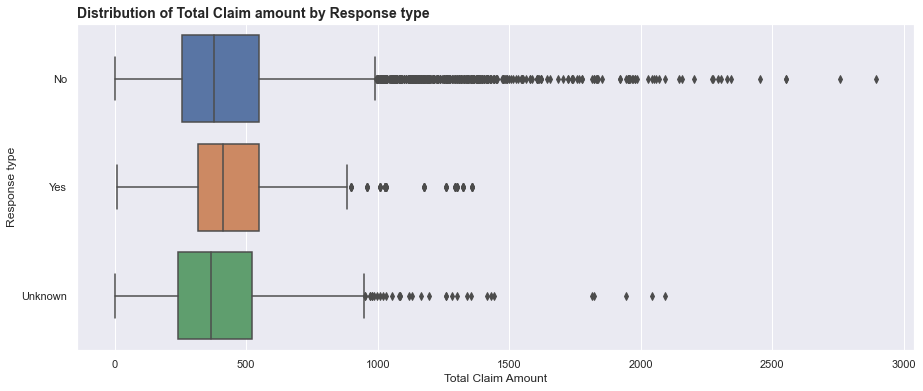

In [32]:
# Boxplot
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x='total_claim_amount', y='response', data=df)
plt.title("Distribution of Total Claim amount by Response type", 
          fontsize = 14, 
          weight = "bold",
        loc='left')
plt.ylabel('Response type')
plt.xlabel('Total Claim Amount');

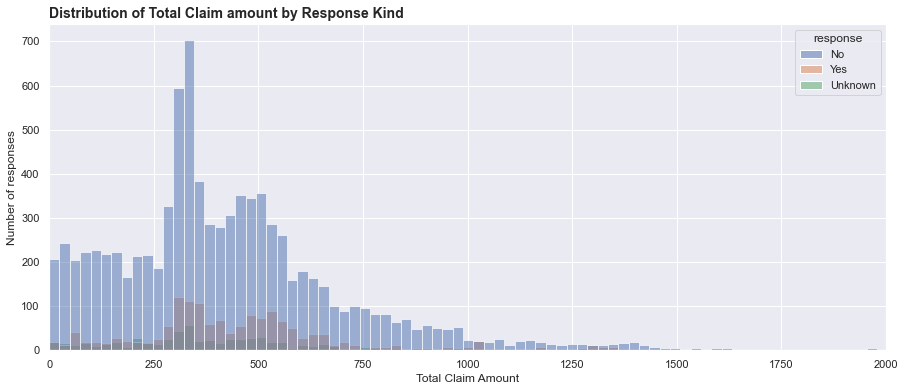

In [34]:
# Distribution plot
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x='total_claim_amount' , hue='response', data=df, ax=ax)
plt.xlim(0,2000)
plt.ylabel('Number of responses')
plt.xlabel('Total Claim Amount')
plt.title("Distribution of Total Claim amount by Response Kind", 
          fontsize = 14, 
          weight = "bold",
        loc='left')
plt.show()

# Create similar plots like in the task before, but for Income

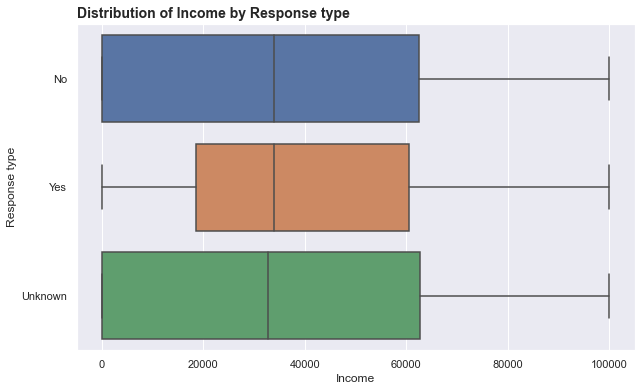

In [33]:
# Barplot
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='income', y='response', data=df)
plt.title("Distribution of Income by Response type", 
          fontsize = 14, 
          weight = "bold",
        loc='left')
plt.ylabel('Response type')
plt.xlabel('Income');

# Create a scatterplot between Total Claim Amount and Income
Play around with the settings of the scatterplot (markersize, alpha level, ...) and in doing so try to identify more features within the data just visually. You can also try different seaborn plots. Check for example this link which explains how to avoid overplotting.

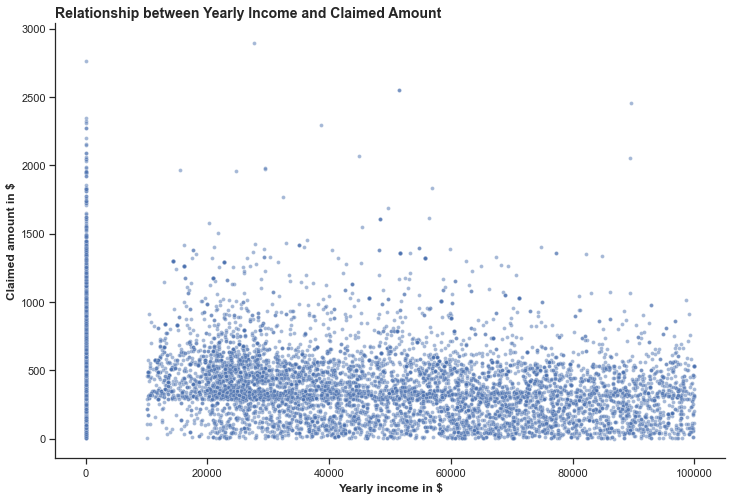

In [61]:
sns.set_style("ticks")
plt.figure(figsize = (12, 8))
sns.scatterplot(y=df['total_claim_amount'],
                x=df['income'],
                alpha=0.5, 
                s=15,
               palette='bright')
sns.despine()
plt.title("Relationship between Yearly Income and Claimed Amount", 
          fontsize = 14, 
          weight = "bold",
        loc='left')
plt.xlabel("Yearly income in $", weight = "bold")
plt.ylabel("Claimed amount in $", weight = "bold")
plt.show()

# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals

In [37]:
numericals = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include=object)

In [40]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        10910 non-null  float64
 1   income                         10910 non-null  int64  
 2   monthly_premium_auto           10910 non-null  int64  
 3   months_since_last_claim        10910 non-null  float64
 4   months_since_policy_inception  10910 non-null  int64  
 5   number_of_open_complaints      10910 non-null  float64
 6   number_of_policies             10910 non-null  int64  
 7   total_claim_amount             10910 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 682.0 KB


In [39]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          10910 non-null  object
 1   state             10910 non-null  object
 2   response          10910 non-null  object
 3   coverage          10910 non-null  object
 4   education         10910 non-null  object
 5   employmentstatus  10910 non-null  object
 6   gender            10910 non-null  object
 7   location_code     10910 non-null  object
 8   marital_status    10910 non-null  object
 9   policy_type       10910 non-null  object
 10  policy            10910 non-null  object
 11  renew_offer_type  10910 non-null  object
 12  sales_channel     10910 non-null  object
 13  vehicle_class     10910 non-null  object
 14  vehicle_size      10910 non-null  object
 15  month             10910 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


# Check the normality of the numerical variables visually

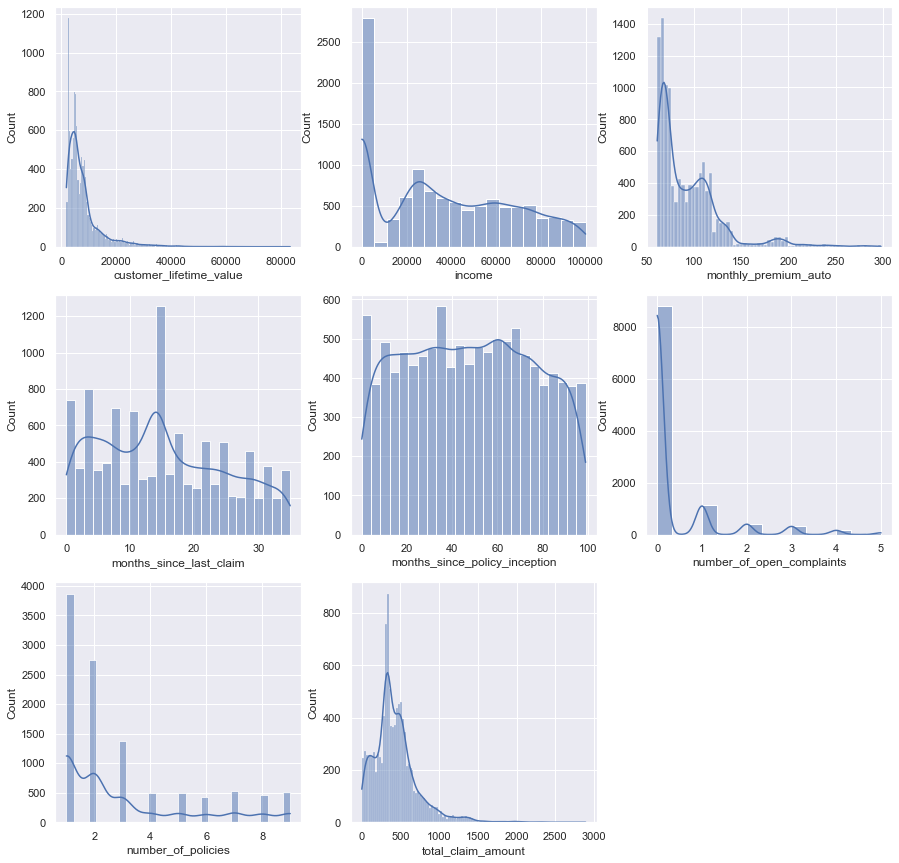

In [96]:
# With seaborn
n_rows=3
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
for i, column in enumerate(numericals.columns):
    sns.histplot(numericals[column], kde=True, ax=axes[i//n_cols,i%n_cols])
axes[2,2].set_axis_off()

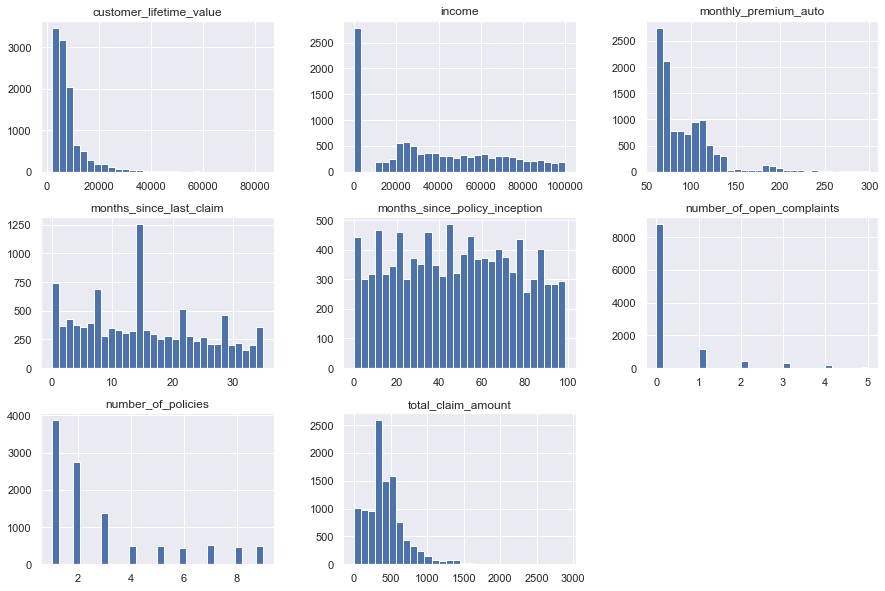

In [98]:
# With matplotlib
numericals.hist(bins=30, figsize=(15, 10), layout=(3, 3));

* **Do the distributions for different numerical variables look like a normal distribution?**  
The only numerical variable that slightly ressembles a normal distribution is total_claim_amount. The rest of them are uniform or so skewed that can't be considered normal.

# Check the multicollinearity between the features

In [51]:
# First, we need the correlation matrix.
correlations_matrix = numericals.corr()

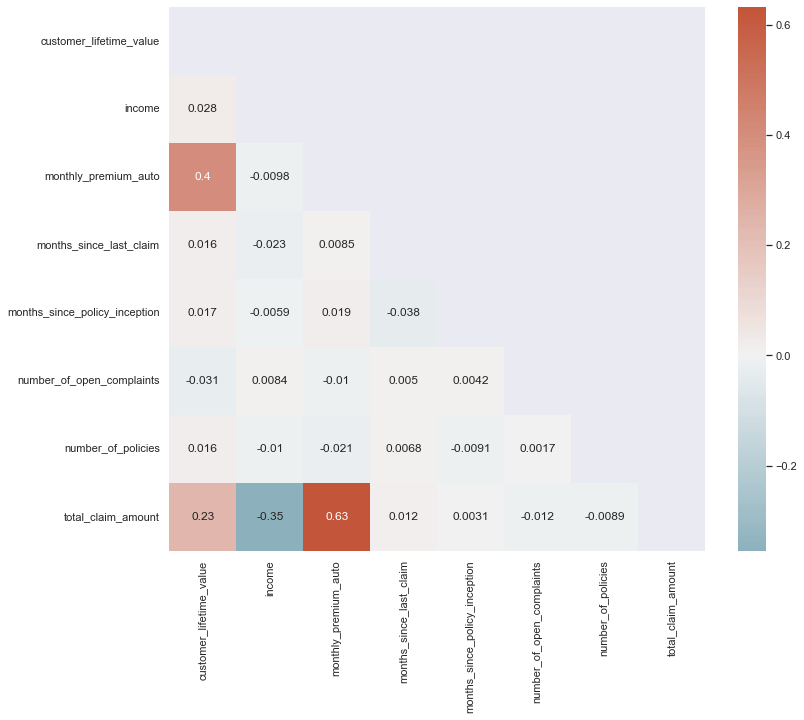

In [55]:
# Now, we create the heatmap, eliminating the re
mask=np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(12,10))
ax=sns.heatmap(correlations_matrix, mask=mask, annot=True, center=0, 
               cmap=sns.diverging_palette(220, 20, as_cmap=True));

* There seems to be no multicollinearity between the numerical predictors. Thus, no columns have to be dropped. Also, there are up to three variables that seem to correlate with total_claim_amount: customer_lifetime_value, income and monthly_premium_auto.